In [1]:
user = "Alex"
pathtorepo = "C:\\Users\\" * user * "\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\system.jl")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\visual_regimes.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

In [3]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [4]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

I0 = -1.7143; U0 = 0.26584

In [731]:
I0 = -1.7145; U0 = 0.26584
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = [10.532246227279463, 0.669565112821875, 0.53087103377493]

ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);
ds

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.26584, 0.305, 0.3, -1.7145]
 time:          0.0
 state:         [10.532246227279463, 0.669565112821875, 0.53087103377493]


In [732]:
tr, trange = trajectory(ds, 1000, Δt = 0.001)

(3-dimensional StateSpaceSet{Float64} with 1000001 points, 0.0:0.001:1000.0)

In [729]:
println("Length: $(length(sol_for))")

Length: 1000002


In [733]:
ts, tf = 100000, 900000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
dis  = 60;

GLMakie.activate!()
f = Figure(resolution = (900, 600))
#ax = Axis3(f[1, 1], azimuth = 0.4pi,
            #xlabel = "E", ylabel = "y", zlabel = "x",
            #xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            #xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            #xgridvisible = false, ygridvisible = false, zgridvisible = false,
            #protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)
            ##yticks = [0.43, 0.45, 0.48])

ax = LScene(f[1, 1])

scale!(ax.scene, 1, 50, 50)

lines!(tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz],
    linewidth = 1.0, color = :black) # linewidth 3.0

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 12)
end

display(f)

GLMakie.Screen(...)

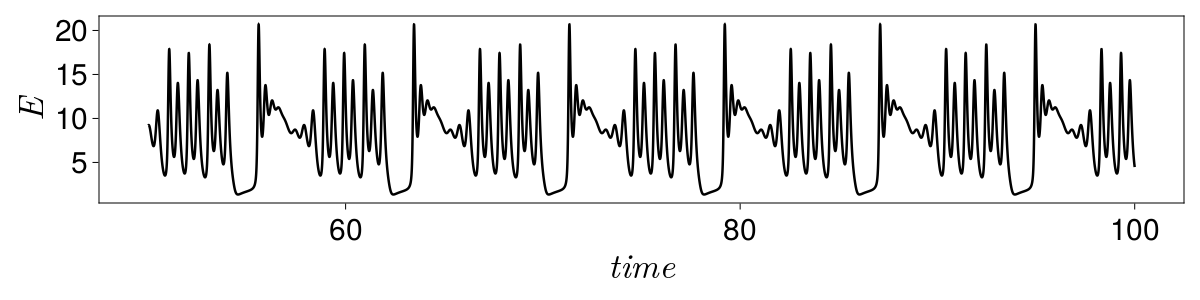

CairoMakie.Screen{IMAGE}


In [659]:
ts, tf = 50000, 100000

CairoMakie.activate!()
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, trange[ts:tf], tr[ts:tf, 1], linewidth = 2.5, color = :black)
display(f)

## Chaotic

In [869]:
#I0chaotic = -1.7142; U0chaotic = 0.26584
pchaotic = SA[α, τ, τD, τy, J, xthr, ythr, U0chaotic, ΔU0, β, I0chaotic]
u0chaotic =  trchaotic[end] # [10.532246227279463, 0.669565112821875, 0.53087103377493]

dschaotic = CoupledODEs(TM, u0chaotic, pchaotic, diffeq = integ_set)
fpchaotic, eichaotic, _ = fixedpoints(dschaotic, box, jacob_TM_)
dschaotic

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.26514, 0.305, 0.3, -1.7107]
 time:          0.0
 state:         [9.795408023525088, 0.7336749175360066, 0.44275174063649436]


In [870]:
trchaotic, trange = trajectory(dschaotic, 1000, Δt = 0.001)

(3-dimensional StateSpaceSet{Float64} with 1000001 points, 0.0:0.001:1000.0)

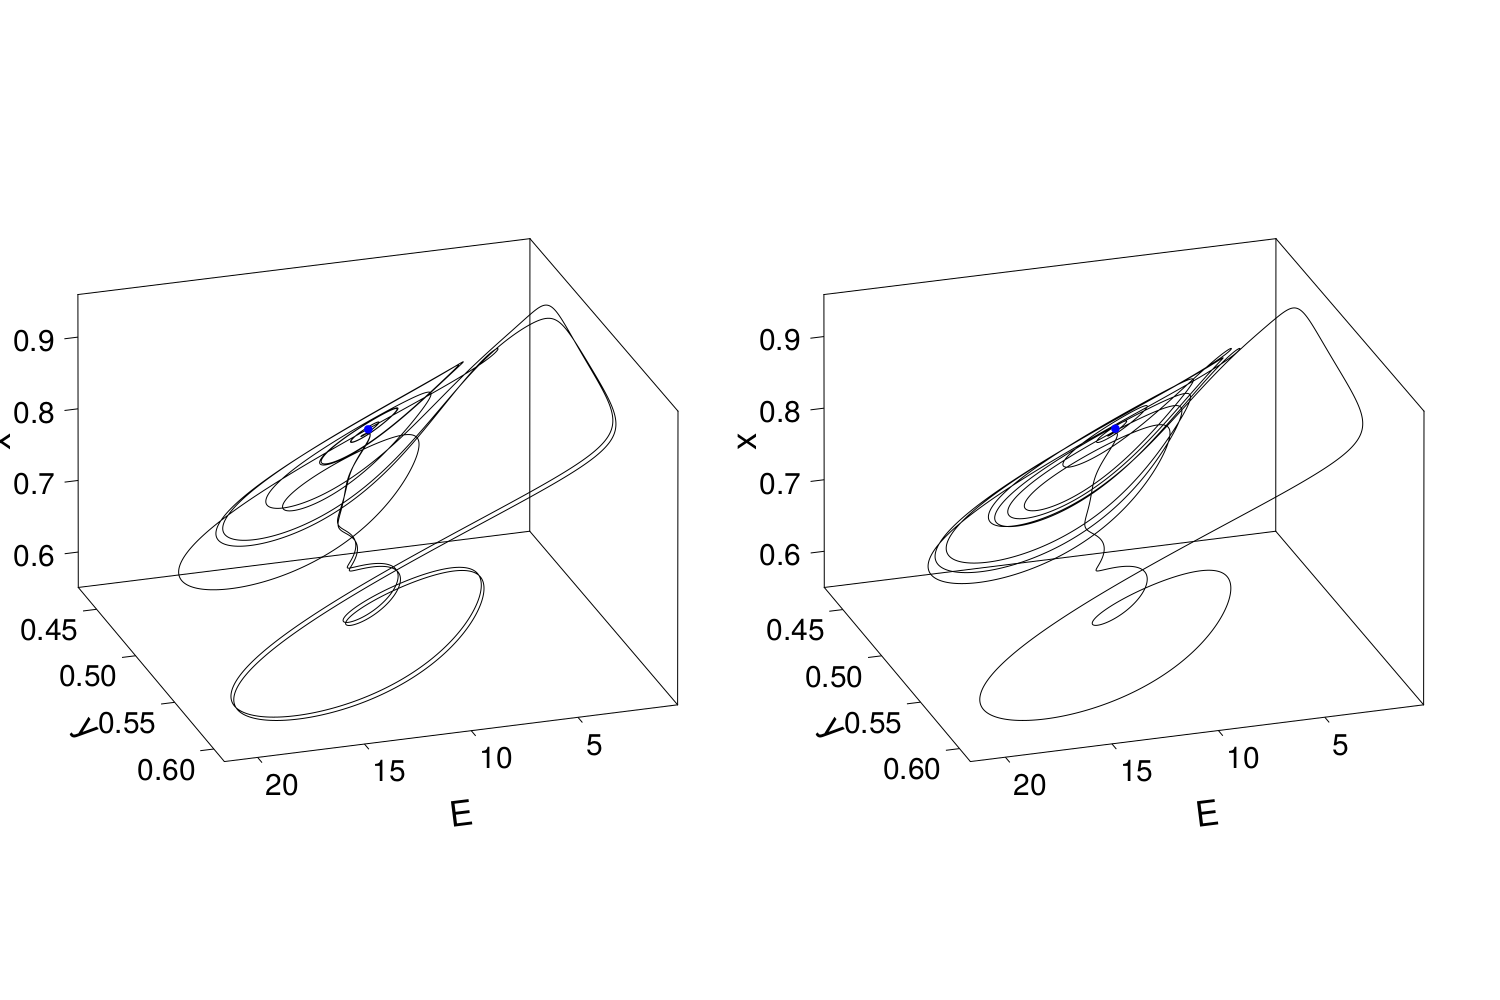

CairoMakie.Screen{IMAGE}


In [871]:
ts, tf = 800000, 850000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (1500, 1000))
ax1 = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)

ax2 = Axis3(f[1, 2], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)

lines!(ax1, trchaotic[ts:tf, idx], trchaotic[ts:tf, idy], trchaotic[ts:tf, idz],
    linewidth = 1.0, color = :black)

for (i, ep) in enumerate(fpchaotic)
    scatter!(ax1, ep[idx], ep[idy], ep[idz], color = :blue, markersize = 12)
end


lines!(ax2, tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz],
    linewidth = 1.0, color = :black) # linewidth 3.0

for (i, ep) in enumerate(fp)
    scatter!(ax2, ep[idx], ep[idy], ep[idz], color = :blue, markersize = 12)
end



display(f)

In [872]:
function distance_btw_plot(p1, p2)
    x1, y1, z1 = p1
    x2, y2, z2 = p2
    dist = sqrt( (x1-x2)^2 + (y1-y2)^2 + (z1-z2)^2 )
    return dist
end

distance_btw_plot (generic function with 1 method)

In [873]:
distance = zeros(length(trchaotic))

for i in range(1, length(distance), step = 1)
    distance[i] = distance_btw_plot(trchaotic[i], fpchaotic[1])
end

dis = minimum(distance)

0.00392993913850099

In [874]:
ts, tf = 500000, 580000
idx, idy, idz = 1, 3, 2

GLMakie.activate!()
f = Figure(resolution = (1500, 1000))

ax = LScene(f[1, 1])
scale!(ax.scene, 1, 50, 50)

lines!(ax, trchaotic[ts:tf, idx], trchaotic[ts:tf, idy], trchaotic[ts:tf, idz],
    linewidth = 1.0, color = :black)

for (i, ep) in enumerate(fpchaotic)
    scatter!(ax, ep[idx], ep[idy], ep[idz], color = :blue, markersize = 12)
end


display(f)

GLMakie.Screen(...)

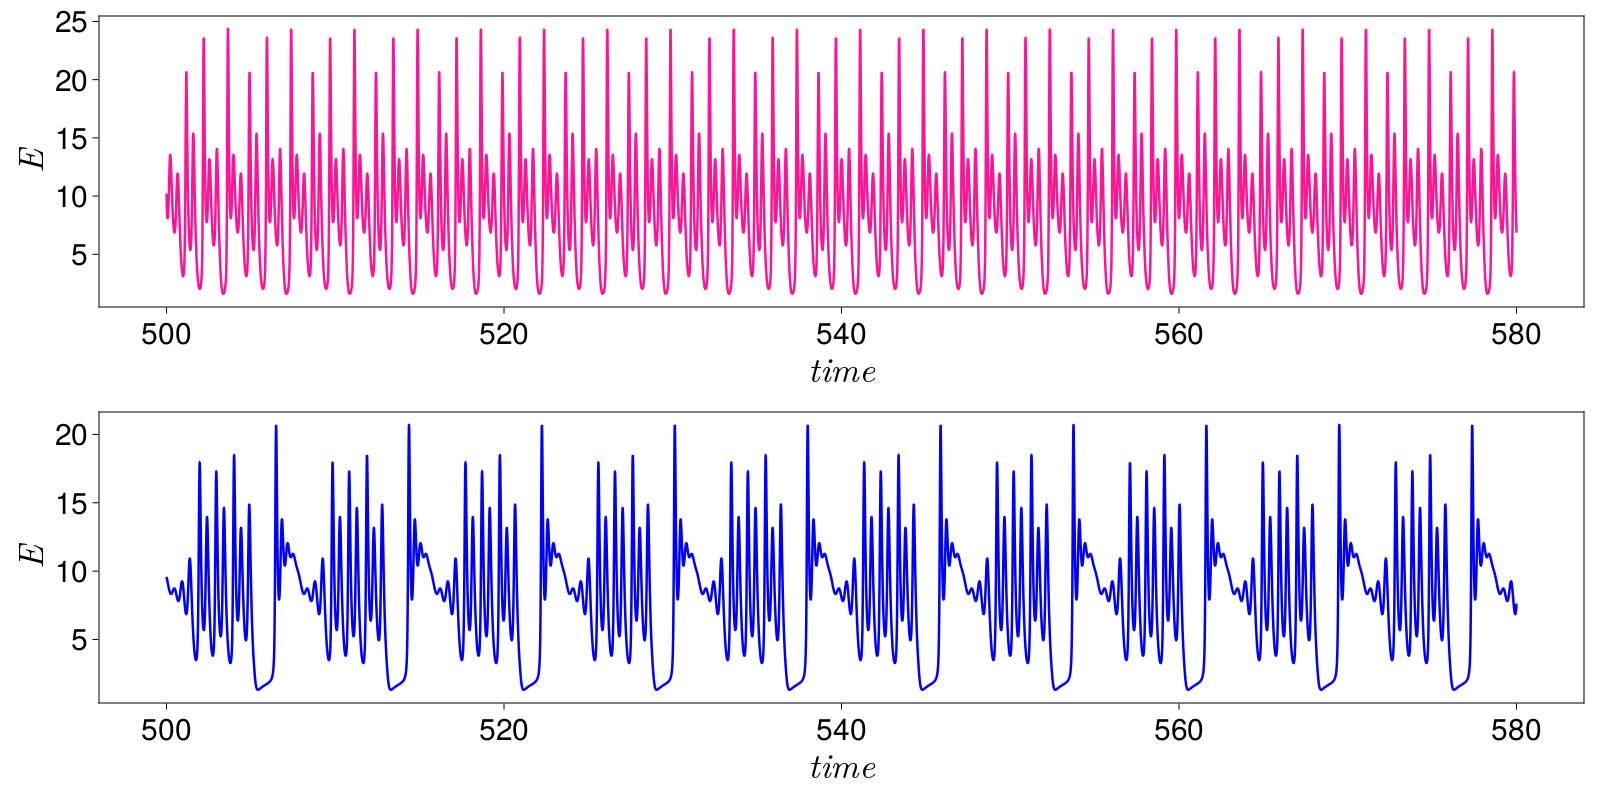

CairoMakie.Screen{IMAGE}


In [795]:
ts, tf = 500000, 580000

CairoMakie.activate!()
f = Figure(resolution = (1600, 800))
axis1 = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)

axis2 = Axis(f[2, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)

chaotic = lines!(axis1, trange[ts:tf], trchaotic[ts:tf, 1], linewidth = 2.5, color = :deeppink, label = "chaotic")
regular = lines!(axis2, trange[ts:tf], tr[ts:tf, 1], linewidth = 2.5, color = :blue, label = "regular burst")


display(f)